# A metodologia CRISP-DM

A metodologia CRISP-DM é descrita em termos de um modelo de processo hierárquico, consistindo em conjuntos de tarefas descritas em quatro níveis de abstração (de geral a específica): fase, tarefa genérica, tarefa especializada e instância do processo (consulte a figura 1).

No nível superior, o processo de mineração de dados é organizado em várias fases; cada fase consiste em várias tarefas genéricas de segundo nível. Esse segundo nível é chamado de genérico porque se destina a ser geral o suficiente para cobrir todas as situações possíveis de mineração de dados. As tarefas genéricas devem ser o mais completas e estáveis ​​possível. Meios completos que abrangem todo o processo de mineração de dados e todos os aplicativos possíveis de mineração de dados. Estável significa que o modelo deve ser válido para desenvolvimentos ainda imprevistos, como novas técnicas de modelagem.

O terceiro nível, o nível de tarefa especializada, é o local para descrever como as ações nas tarefas genéricas devem ser realizadas em determinadas situações específicas. Por exemplo, no segundo nível, pode haver uma tarefa genérica chamada dados limpos. O terceiro nível descreve como essa tarefa difere em diferentes situações, como a limpeza de valores numéricos versus a limpeza de valores categóricos, ou se o tipo de problema é clustering ou modelagem preditiva.

A descrição de fases e tarefas como etapas discretas executadas em uma ordem específica representa uma sequência idealizada de eventos. Na prática, muitas das tarefas podem ser executadas em uma ordem diferente, e muitas vezes será necessário voltar repetidamente às tarefas anteriores e repetir determinadas ações. Nosso modelo de processo não tenta capturar todas essas rotas possíveis por meio do processo de mineração de dados, porque isso exigiria um modelo de processo excessivamente complexo.

O quarto nível, a instância do processo, é um registro das ações, decisões e resultados de um compromisso real de mineração de dados. Uma instância do processo é organizada de acordo com as tarefas definidas nos níveis mais altos, mas representa o que realmente aconteceu em um compromisso específico, e não o que acontece em geral.

![Figura 1 - Repartição em quatro níveis da metodologia CRISP-DM](./image/Figura_1_-_Repartição_em_quatro_níveis_da_metodologia_CRISP-DM.png)



Download da biblioteca **yfinance** para coletar as informações das ações.

Obs.: Retirar o '!' (ponto de exclamação) do início do comando caso esteja no google colab.

In [1]:
!pip install yfinance
!pip install numpy==1.19.4

Importação das bibliotecas que serão utilizadas no processo de análise.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf
%matplotlib inline

# Coleta das informações da ação

In [3]:
ticket = yf.Ticker('^BVSP')
#df = ticket.history(period='3y', interval='1mo')
df = ticket.history(interval='1d', start='2018-01-01', end='2021-08-31')

Visualização dos primeiros cinco registros.

In [4]:
df.head()

Open     High      Low    Close   Volume  Dividends  \
Date                                                                 
2018-01-02  76403.0  77909.0  76403.0  77891.0  2880300          0   
2018-01-03  77889.0  78414.0  77602.0  77995.0  3142200          0   
2018-01-04  77998.0  79135.0  77998.0  78647.0  3486100          0   
2018-01-05  78644.0  79071.0  78218.0  79071.0  2747100          0   
2018-01-08  79070.0  79395.0  78631.0  79379.0  2550800          0   

            Stock Splits  
Date                      
2018-01-02             0  
2018-01-03             0  
2018-01-04             0  
2018-01-05             0  
2018-01-08             0

Visualização dos últimos cinco registros.

In [5]:
df.tail()

Open          High            Low          Close  \
Date                                                                    
2021-08-24  117474.000000  120463.00000  117474.000000  120211.000000   
2021-08-25  120210.000000  120818.00000  119226.000000  120818.000000   
2021-08-26  120817.000000  120833.00000  118719.000000  118724.000000   
2021-08-27  118725.000000  120678.00000  118721.000000  120678.000000   
2021-08-30  120677.328125  120684.46875  119354.117188  119739.960938   

             Volume  Dividends  Stock Splits  
Date                                          
2021-08-24  9181000          0             0  
2021-08-25  7520100          0             0  
2021-08-26  8426900          0             0  
2021-08-27  7323600          0             0  
2021-08-30        0          0             0

In [6]:
import plotly.graph_objs as go

In [7]:
def plotCandleStick(df, acao='ticket'):
    tracel = {
        'x' : df.index,
        'open' : df.Open,
        'close' : df.Close,
        'high' : df.High,
        'low' : df.Low,
        'type' : 'candlestick',
        'name' : acao,
        'showlegend' : True
    }
    
    data = [tracel]
    layout = go.Layout()
    
    fig = go.Figure(data=data, layout=layout)
    return fig

In [8]:
plotCandleStick(df)

# Decomposição de uma serie temporal

Modelos matemáticos
https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


In [9]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', freq=30, extrapolate_trend=30)

<ipython-input-9-941ca70dcb98>:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



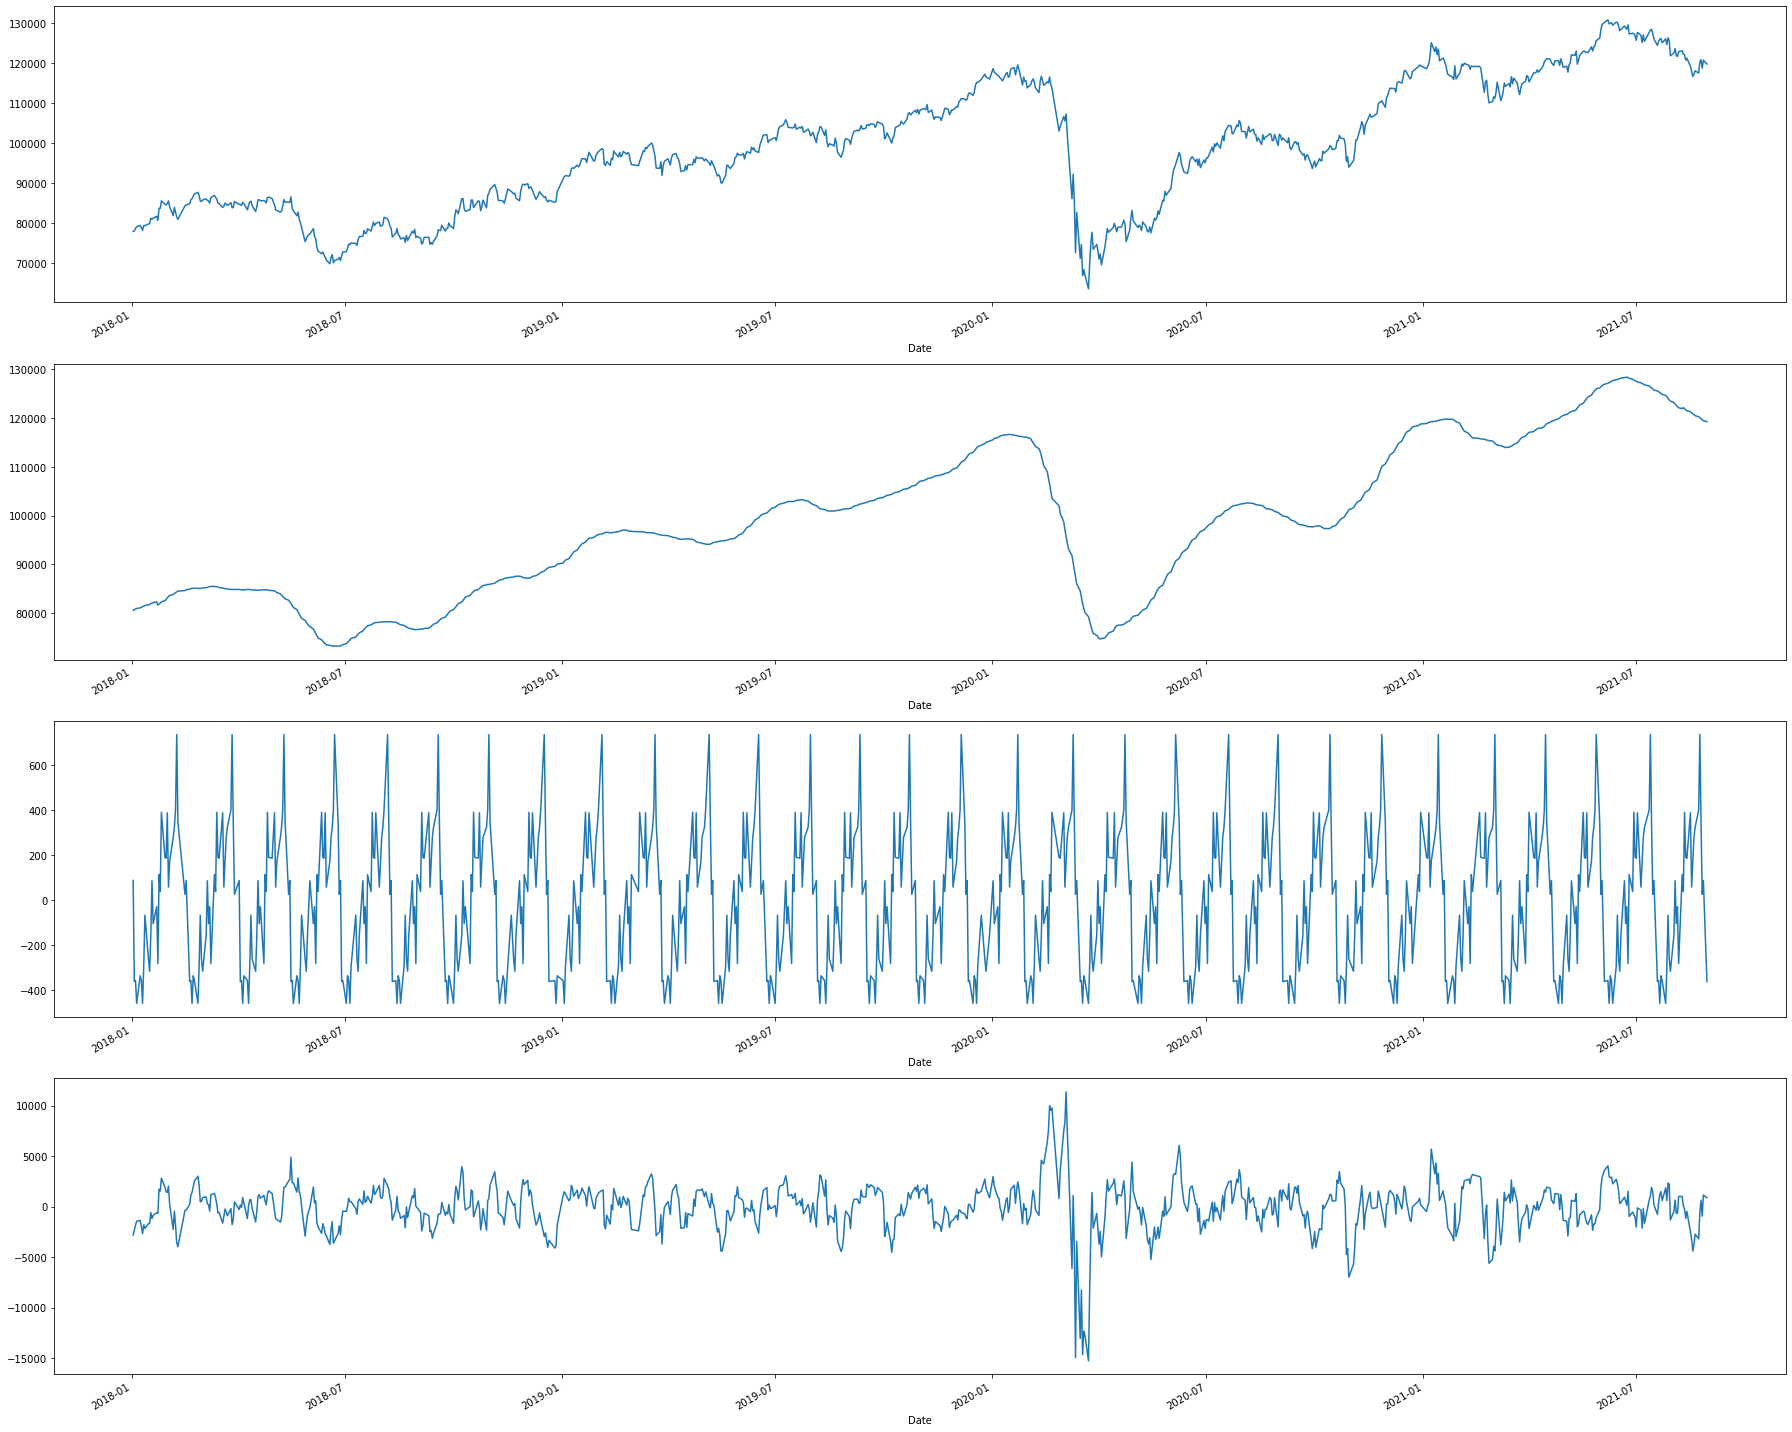

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(25,20))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

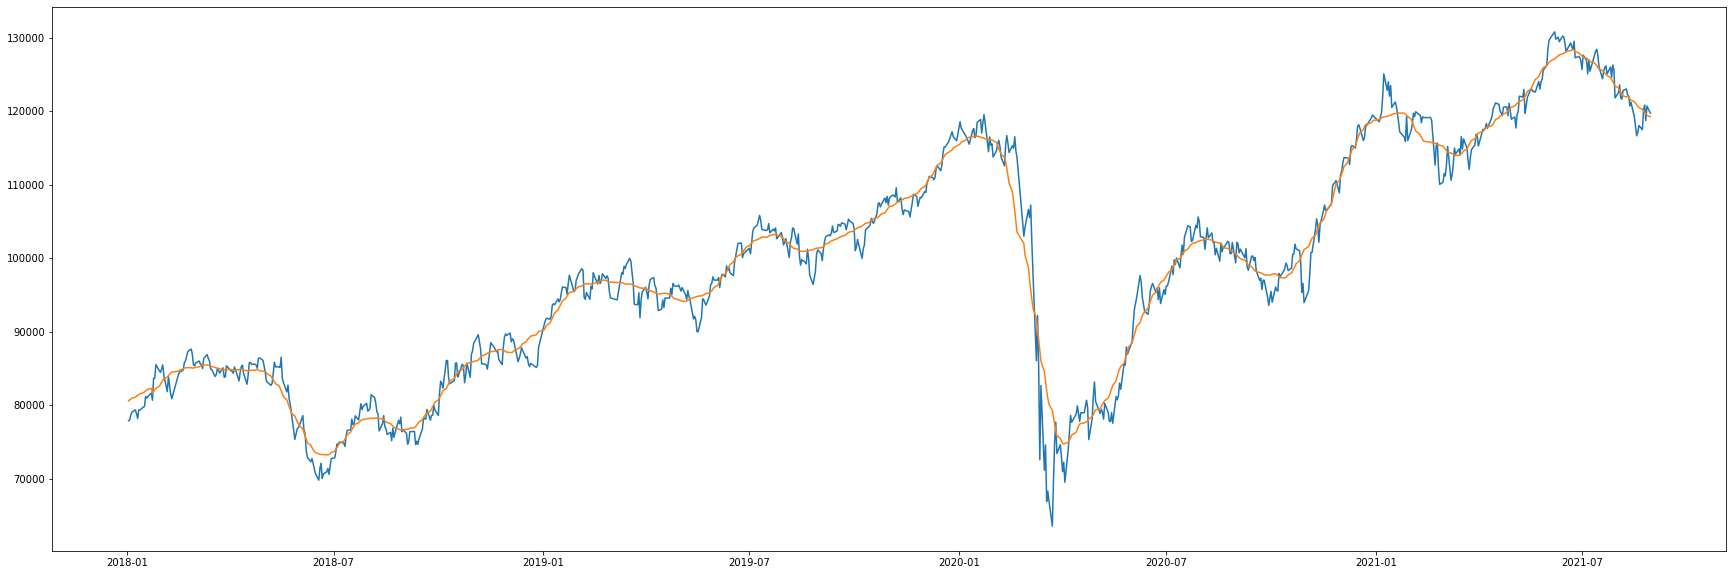

In [11]:
ax, fig = plt.subplots(figsize=(30,10))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

# Calculo da média móvel

In [12]:
df['Close'].rolling(7).mean()

Date
2018-01-02              NaN
2018-01-03              NaN
2018-01-04              NaN
2018-01-05              NaN
2018-01-08              NaN
                  ...      
2021-08-24    118089.714286
2021-08-25    118323.714286
2021-08-26    118440.857143
2021-08-27    119017.285714
2021-08-30    119385.137277
Name: Close, Length: 902, dtype: float64

In [13]:
media_movel7d = df['Close'].rolling(7).mean()
media_movel14d = df['Close'].rolling(14).mean()
media_movel21d = df['Close'].rolling(21).mean()

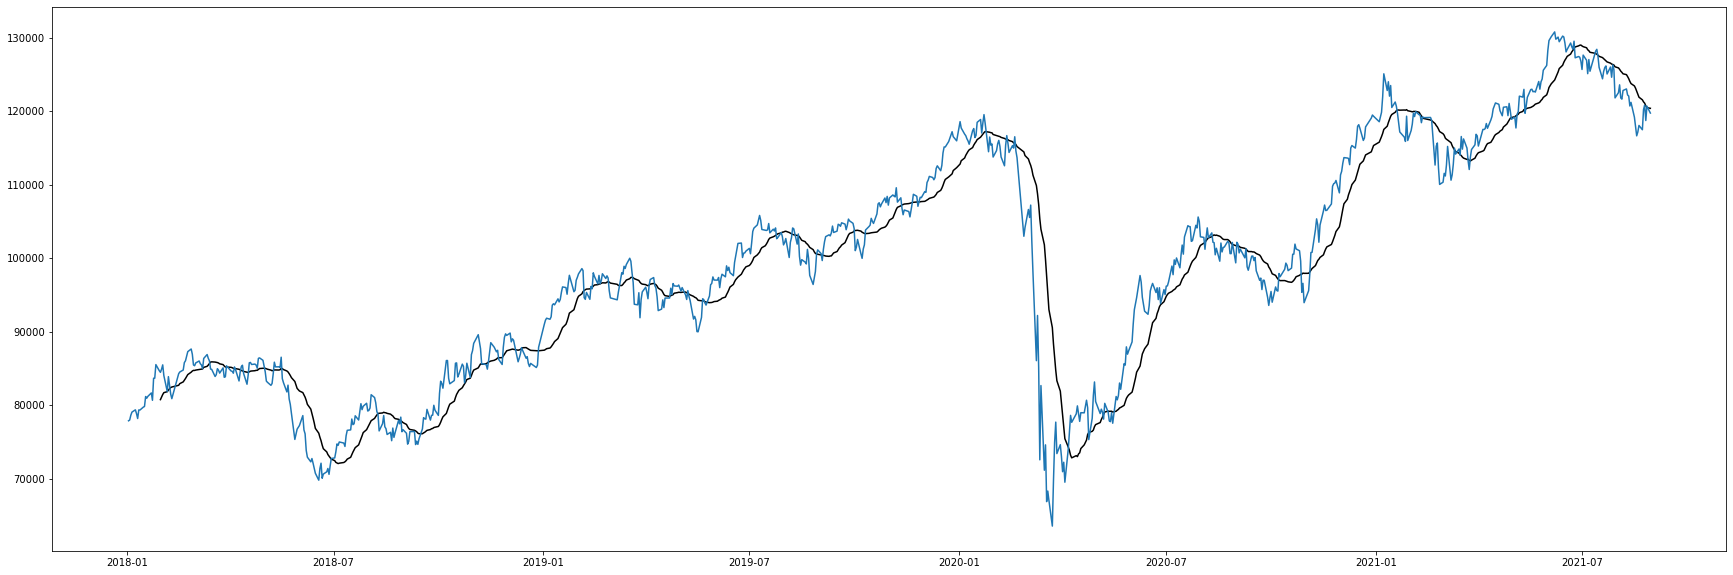

In [14]:
ax, fig = plt.subplots(figsize=(30,10))
#plt.plot(media_movel7d, 'orange')
#plt.plot(media_movel14d, 'red')
plt.plot(media_movel21d, 'black')
plt.plot(df['Close'])

In [15]:
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
# Criação de um novo DaraFrame somente com a colula 'Close'
data = df.filter(['Close'])
num_max = data.max()[0]
# Converter o DataFrame em um numpy array
dataset = data.values

# Pega a quantidade de linhas para o treino
training_data_len = math.ceil( len(dataset) * 0.8)
training_data_len

722

In [17]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data

In [18]:
# Criação do conjunto de dados de treino
# Criação do conjunto de dados de treino normalizado
train_data = scaled_data[0:training_data_len , :]

# Separação entre os conjuntos de dados x_tran e y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(662, 60, 1)

In [21]:
# Construindo o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
# Compilação do modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.fit(x_train, y_train, batch_size=1, epochs=15)

Epoch 1/15
662/662 [==============================] - 7s 11ms/step - loss: 0.0125
Epoch 2/15
662/662 [==============================] - 7s 10ms/step - loss: 0.0055: 0s - l
Epoch 3/15
662/662 [==============================] - 7s 11ms/step - loss: 0.0051
Epoch 4/15
662/662 [==============================] - 7s 11ms/step - loss: 0.0046
Epoch 5/15
662/662 [==============================] - 7s 11ms/step - loss: 0.0039
Epoch 6/15
662/662 [==============================] - 7s 11ms/step - loss: 0.0040
Epoch 7/15
662/662 [==============================] - 8s 12ms/step - loss: 0.0039
Epoch 8/15
662/662 [==============================] - 8s 12ms/step - loss: 0.0037
Epoch 9/15
662/662 [==============================] - 7s 11ms/step - loss: 0.0035: 0s - loss: 0.00
Epoch 10/15
662/662 [==============================] - 7s 11ms/step - loss: 0.0038
Epoch 11/15
662/662 [==============================] - 8s 13ms/step - loss: 0.0038
Epoch 12/15
662/662 [==============================] - 8s 12ms/step - l

In [24]:
test_data = scaled_data[training_data_len-60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [25]:
x_test = np.array(x_test)

In [26]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(180, 60, 1)

In [27]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [28]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

201.415234375

<ipython-input-29-c5817d9f9aba>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



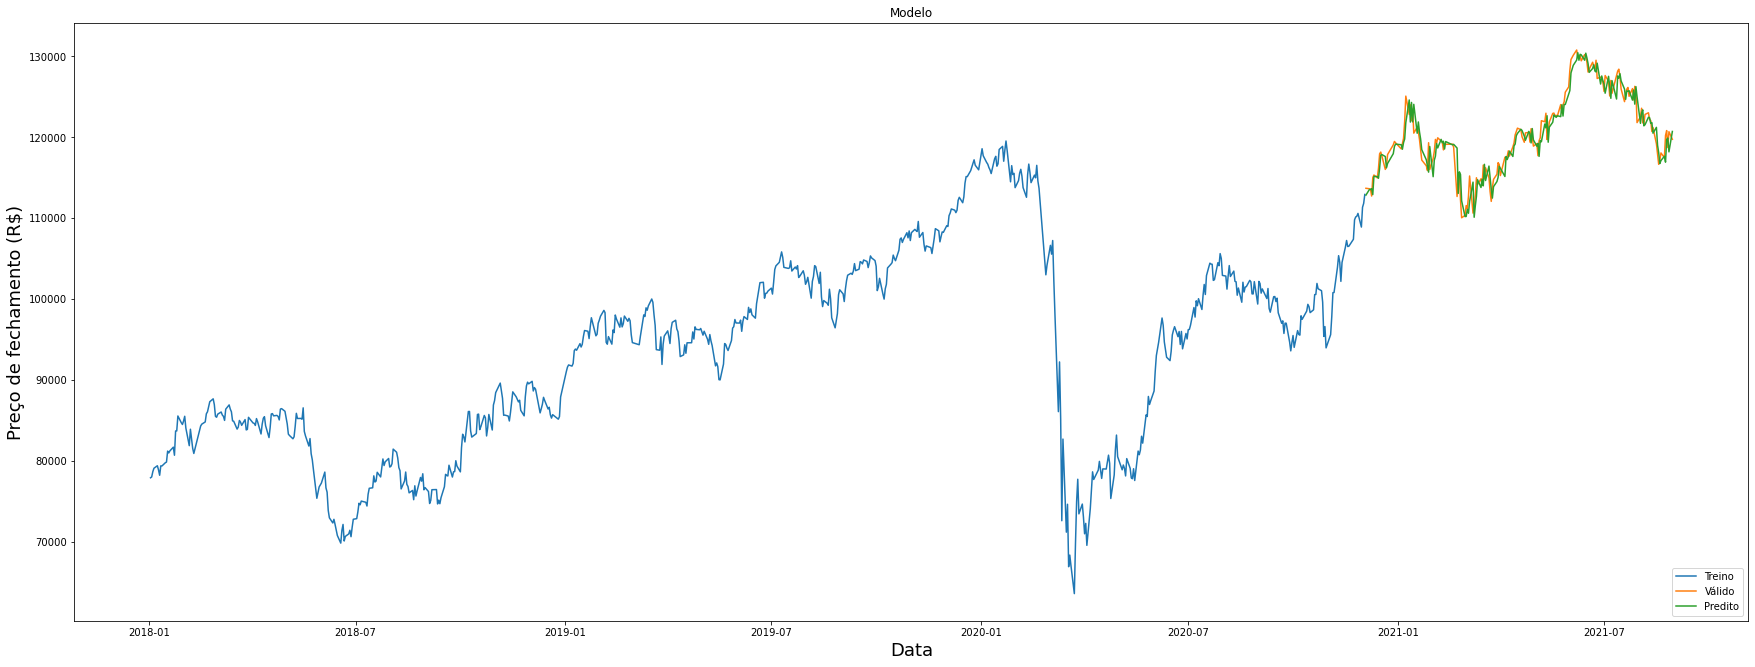

In [29]:
# Plot dos dados
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualização dos dados
plt.figure(figsize=(30,11))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preço de fechamento (R$)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
#plt.plot(valid[['Close', 'Predictions', 'Predict']])
plt.legend(['Treino', 'Válido', 'Predito'], loc='lower right')
plt.show()

# Predição da ação!

In [30]:
new_df = df.filter(['Close'])

In [31]:
last_60_days = new_df[-60:].values

In [32]:
days_pred_price = []
for i in range(10):
    #print(i)
    if i == 0:
        last_60_days_scaled = scaler.transform(last_60_days)
        X_test = []
        X_test.append(last_60_days_scaled)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = model.predict(X_test)
        last_60_days_scaled = np.append(last_60_days_scaled, pred_price[0])
        #print(last_60_days_scaled)
        #last_60_days_scaled.append(pred_price)
        pred_price = scaler.inverse_transform(pred_price)
        days_pred_price.append(pred_price)
    else:
        last_60_days_scaled = last_60_days_scaled[-60:]
        X_test = []
        X_test.append(last_60_days_scaled)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = model.predict(X_test)
        last_60_days_scaled = np.append(last_60_days_scaled, pred_price[0])
        #print(last_60_days_scaled)
        #last_60_days_scaled.append(pred_price)
        pred_price = scaler.inverse_transform(pred_price)
        days_pred_price.append(pred_price)

In [33]:
days_pred_price_real = []
for i in days_pred_price:
    for j in i:
        for k in j:
            days_pred_price_real.append(k)

In [34]:
days_pred_price

[array([[119384.4]], dtype=float32),
 array([[119515.44]], dtype=float32),
 array([[119594.26]], dtype=float32),
 array([[119617.87]], dtype=float32),
 array([[119584.086]], dtype=float32),
 array([[119509.66]], dtype=float32),
 array([[119413.914]], dtype=float32),
 array([[119307.44]], dtype=float32),
 array([[119193.75]], dtype=float32),
 array([[119073.3]], dtype=float32)]

In [35]:
ix_y_pred = []
for i in range(len(days_pred_price_real)):
    ix_y_pred.append(max(df.index) + pd.DateOffset(i+1))
    
df_y_pred = pd.DataFrame(data=days_pred_price_real, index=ix_y_pred, columns=['Predict'])

In [36]:
df_y_pred

Predict
2021-08-31  119384.398438
2021-09-01  119515.437500
2021-09-02  119594.257812
2021-09-03  119617.867188
2021-09-04  119584.085938
2021-09-05  119509.656250
2021-09-06  119413.914062
2021-09-07  119307.437500
2021-09-08  119193.750000
2021-09-09  119073.296875

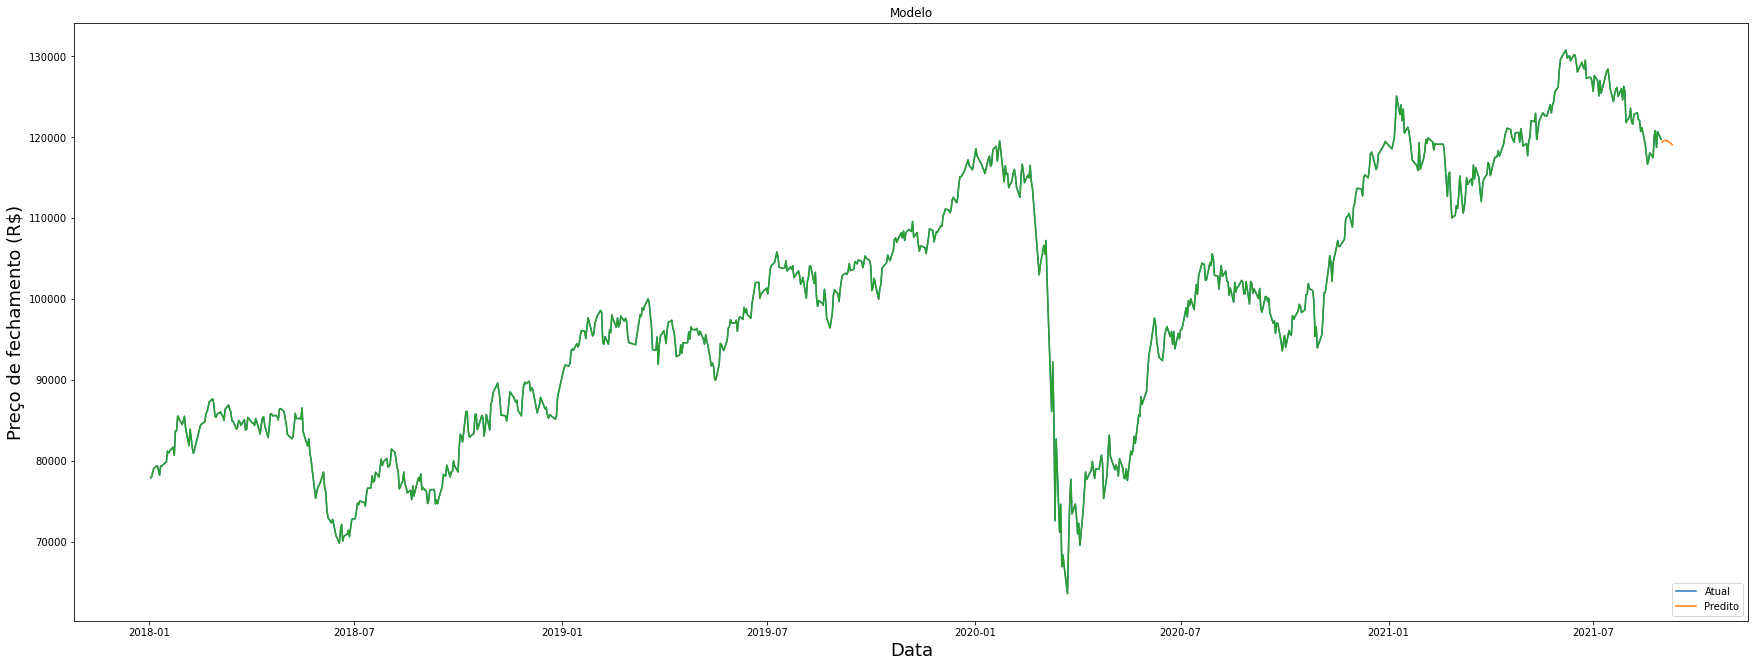

In [37]:
df = df.append(df_y_pred, sort=False)

plt.figure(figsize=(30,11))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preço de fechamento (R$)', fontsize = 18)
plt.plot(df[['Close', 'Predict']])
plt.plot(df['Close'])
plt.legend(['Atual', 'Predito'], loc='lower right')
plt.show()